# Densely-connected Neural Network Implementation 

### 1. Load required packages

In [11]:
import os,sys
import pandas as pd
from sklearn.model_selection import train_test_split
import scipy.io
import numpy as np 
from scipy.spatial.distance import pdist
import time 
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import keras
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras import initializers
from keras.optimizers import Adam
from keras.utils import to_categorical

### 2. Load data and split

In [12]:
path = '/Users/ConleyFKL/Desktop/Spring2020-Project3-ads-spring2020-project3-group1-master/data/'
dat_full = pd.read_csv(path + "dat_full.csv")
X = dat_full.loc[:, 'feature1' : 'feature6006']
y = dat_full['emotion_idx']
Y = to_categorical(y)[:,1:]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=666)

<font color='purple'>  : **Vanishing gradient** <br> The speed of learning decreases very rapidly for the shallower layers as the network trains

<font color='purple'> **Note:**
    
Test three models with same structure but with slightly different hyperparameter settings. (units in each Densely-connected NN layer)

### 3. Model 1

__Procedure__

BatchNorm -> Densely-connected NN -> ReLu -> Dropout -> BatchNorm -> Densely-connected NN -> ReLu -> Dropout -> Densely-connected NN -> ReLu -> Dropout -> Densely-connected NN -> ReLu -> Densely-connected NN -> Softmax -> Output

In [43]:
input_shape = [6006] 
input_layer = Input(input_shape)
x = BatchNormalization()(input_layer) 
x = Dense(22*20,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x) 
x = Dense(22*10,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = Dense(22*6,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = Dense(22*2,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
output_layer = Dense(22,activation='softmax',kernel_initializer=initializers.glorot_normal(seed=4))(x) 
model = Model(input_layer,output_layer)

In [44]:
start_time = time.time()
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model_history = model.fit(X_train,y_train,epochs = 30, validation_data=[X_test,y_test])
print("training  model takes %s seconds" % round((time.time() - start_time),3))

Train on 2000 samples, validate on 500 samples
Epoch 1/30
2000/2000 [==============================] - 11s 6ms/step - loss: 3.0666 - accuracy: 0.0930 - val_loss: 4.5969 - val_accuracy: 0.0760
Epoch 2/30
2000/2000 [==============================] - 7s 3ms/step - loss: 2.6207 - accuracy: 0.1905 - val_loss: 2.9982 - val_accuracy: 0.1660
Epoch 3/30
2000/2000 [==============================] - 8s 4ms/step - loss: 2.3283 - accuracy: 0.2505 - val_loss: 2.0983 - val_accuracy: 0.3080
Epoch 4/30
2000/2000 [==============================] - 9s 4ms/step - loss: 2.1220 - accuracy: 0.3205 - val_loss: 1.8999 - val_accuracy: 0.3460
Epoch 5/30
2000/2000 [==============================] - 8s 4ms/step - loss: 1.9752 - accuracy: 0.3385 - val_loss: 1.7377 - val_accuracy: 0.4040
Epoch 6/30
2000/2000 [==============================] - 8s 4ms/step - loss: 1.8607 - accuracy: 0.3755 - val_loss: 1.7766 - val_accuracy: 0.3800
Epoch 7/30
2000/2000 [==============================] - 8s 4ms/step - loss: 1.8163 - acc

Text(0.5, 1.0, 'Accuracy Curves')

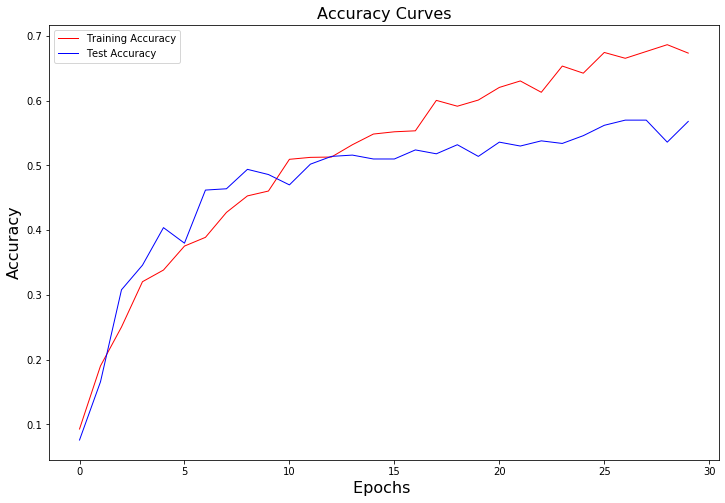

In [46]:
fig, ax = plt.subplots(figsize=[12,8])
ax.plot(model_history.history['accuracy'],'r',linewidth=1.0, label = 'Training Accuracy')
ax.plot(model_history.history['val_accuracy'],'b',linewidth=1.0, label = 'Test Accuracy')
ax.legend()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [47]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

500/500 [==============================] - 0s 623us/step
Loss = 1.376056674003601
Test Accuracy = 0.5680000185966492


### 4. Model 2

__Procedure__

BatchNorm -> Densely-connected NN -> ReLu -> Dropout -> BatchNorm -> Densely-connected NN -> ReLu -> Dropout -> Densely-connected NN -> ReLu -> Dropout -> Densely-connected NN -> ReLu -> Densely-connected NN -> Softmax -> Output

In [19]:
input_shape = [6006] 
input_layer = Input(input_shape)
x = BatchNormalization(momentum = 0.88)(input_layer) 
x = Dense(22*10,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x) 
x = Dense(22*8,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = Dense(22*4,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = Dense(22*2,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
output_layer = Dense(22,activation='softmax',kernel_initializer=initializers.glorot_normal(seed=4))(x) 
model2 = Model(input_layer,output_layer)

In [20]:
start_time = time.time()
model2.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model_history = model2.fit(X_train,y_train,epochs = 30)
print("training  model takes %s seconds" % round((time.time() - start_time),3))

Epoch 1/30
2000/2000 [==============================] - 7s 4ms/step - loss: 3.0321 - accuracy: 0.0795: 
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 2.7016 - accuracy: 0.1640
Epoch 3/30
2000/2000 [==============================] - 5s 2ms/step - loss: 2.3650 - accuracy: 0.2305
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 2.1604 - accuracy: 0.2845
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 2.0130 - accuracy: 0.3115
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 1.9215 - accuracy: 0.3335
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 1.8120 - accuracy: 0.3885
Epoch 8/30
2000/2000 [==============================] - 4s 2ms/step - loss: 1.7596 - accuracy: 0.4005
Epoch 9/30
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6843 - accuracy: 0.4295
Epoch 10/30
2000/2000 [==============================] - 4s 2ms/step - loss: 1.6

Text(0.5, 1.0, 'Accuracy Curves')

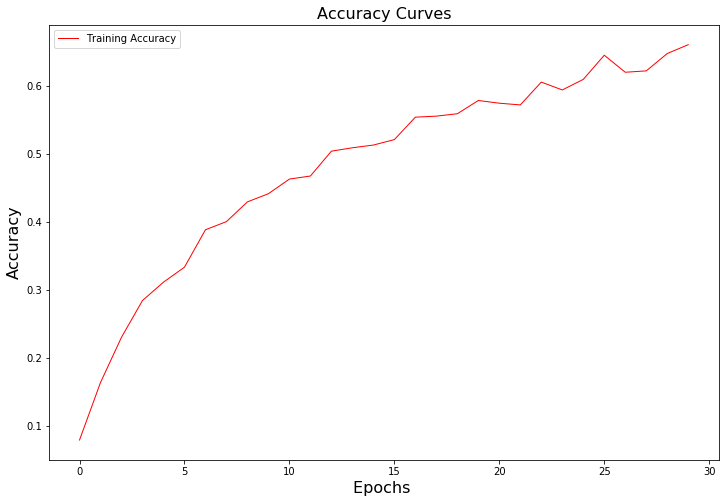

In [21]:
fig, ax = plt.subplots(figsize=[12,8])
ax.plot(model_history.history['accuracy'],'r',linewidth=1.0, label = 'Training Accuracy')
ax.legend()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [49]:
preds = model2.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

500/500 [==============================] - 0s 610us/step
Loss = 1.3495083694458008
Test Accuracy = 0.5540000200271606


In [45]:
#y = []
#for i in model2.predict(X_test):
#    y.append(np.argmax(i) + 1)
#y

### 5. Model 3

__Procedure__

BatchNorm -> Densely-connected NN -> ReLu -> Dropout -> BatchNorm -> Densely-connected NN -> ReLu -> Dropout -> Densely-connected NN -> ReLu -> Dropout -> Densely-connected NN -> ReLu -> Densely-connected NN -> Softmax -> Output

In [160]:
input_shape = [6006] 
input_layer = Input(input_shape)
x = BatchNormalization(momentum = 0.88)(input_layer) 
x = Dense(22*20,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x) 
x = Dense(22*10,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = Dense(22*6,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
x = Dropout(0.25)(x)
x = Dense(22*2,activation='relu',kernel_initializer=initializers.glorot_normal(seed=4))(x)
output_layer = Dense(22,activation='softmax',kernel_initializer=initializers.glorot_normal(seed=4))(x) 
model3 = Model(input_layer,output_layer)

In [161]:
start_time = time.time()
model3.compile(loss='categorical_crossentropy',optimizer = Adam(lr=0.001),metrics=['accuracy'])
model_history = model3.fit(X_train,y_train,epochs = 30, validation_data=[X_test,y_test])
print("training  model takes %s seconds" % round((time.time() - start_time),3))

Train on 2000 samples, validate on 500 samples
Epoch 1/30
2000/2000 [==============================] - 13s 6ms/step - loss: 3.0063 - accuracy: 0.0960 - val_loss: 2.6684 - val_accuracy: 0.1860
Epoch 2/30
2000/2000 [==============================] - 8s 4ms/step - loss: 2.5629 - accuracy: 0.2005 - val_loss: 2.2812 - val_accuracy: 0.2700
Epoch 3/30
2000/2000 [==============================] - 10s 5ms/step - loss: 2.2624 - accuracy: 0.2880 - val_loss: 2.0822 - val_accuracy: 0.2940
Epoch 4/30
2000/2000 [==============================] - 10s 5ms/step - loss: 2.0903 - accuracy: 0.3235 - val_loss: 1.9359 - val_accuracy: 0.3360
Epoch 5/30
2000/2000 [==============================] - 10s 5ms/step - loss: 1.9284 - accuracy: 0.3630 - val_loss: 1.7711 - val_accuracy: 0.3940
Epoch 6/30
2000/2000 [==============================] - 10s 5ms/step - loss: 1.8358 - accuracy: 0.3775 - val_loss: 1.7649 - val_accuracy: 0.4120
Epoch 7/30
2000/2000 [==============================] - 9s 5ms/step - loss: 1.7567 -

Text(0.5, 1.0, 'Accuracy Curves')

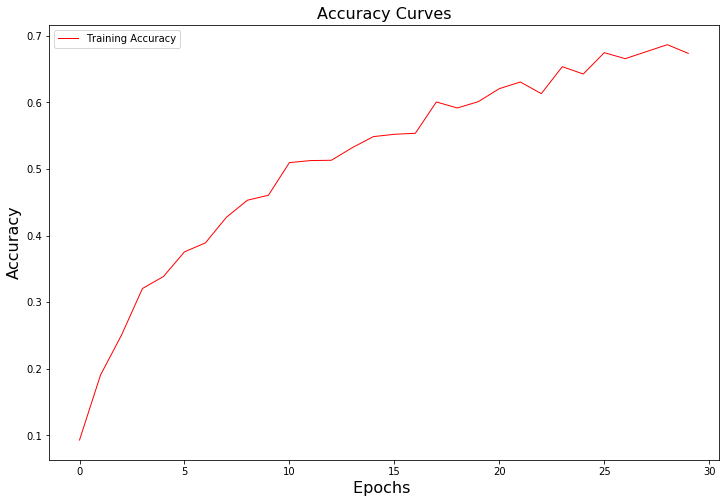

In [48]:
fig, ax = plt.subplots(figsize=[12,8])
ax.plot(model_history.history['accuracy'],'r',linewidth=1.0, label = 'Training Accuracy')
ax.legend()
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [163]:
preds = model3.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

500/500 [==============================] - 0s 710us/step
Loss = 1.4904339685440064
Test Accuracy = 0.5339999794960022
